## Линейная регрессия. Однофакторный дисперсионный анализ

#### Задача 1

Дана матрица объект-признак

X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
Является ли значимым получившееся уравнение регрессии?

In [72]:
import pandas as pd
import numpy as np
from scipy import stats
import itertools
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

In [3]:
X = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
              [-0.18757272, 1.30337355, 5.12093014, 3.46363202],
              [-0.81094525, 1.82463398, 5.79686488, 1.86159445],
              [ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
              [ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
              [-0.62972637, 0.77750764, 2.84124027, 4.54410559],
              [ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
              [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
              [ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
              [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])

In [4]:
y = np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
              7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

In [12]:
a = np.array(range(X.shape[1])) 
Res = [(0,0), 0]

In [22]:
for i in list(itertools.combinations(a, 2)): 
    x1 = X[:, i] 
    x1 = np.hstack((np.ones((x1.shape[0], 1)), x1)) 
    XTX = x1.T.dot(x1) 
    XTX_inv = np.linalg.inv(XTX)  
    b = XTX_inv.dot(x1.T).dot(y) 
    z1 = x1.dot(b) 
    e1 = y - z1 
    R1 = 1 - e1.var() / y.var() 
    if R1 > Res[1]:
        Res[0] = i
        Res[1] = R1
print(f'Максимальный коэффициент детерминации: {round(Res[1], 4)} при сочетании признаков {Res[0]}')

Максимальный коэффициент детерминации: 0.7634 при сочетании признаков (0, 2)


In [28]:
n = x1.shape[0]
n

10

In [29]:
m = 2
k1 = m 
k2 = n - m - 1
F = (R1 / k1) / ((1 - R1) / k2) 
F

5.770098595498483

In [30]:
alpha = 0.05 
t = stats.f.ppf(1 - alpha, k1, k2) 
t

4.73741412777588

In [31]:
if F >= t: 
    print('Статистика попала в критическую область, уравнение регрессии признаётся значимым.')
else:
    print('Статистика не попала в критическую область, уравнение регрессии не признаётся значимым.')

Статистика попала в критическую область, уравнение регрессии признаётся значимым.


#### Задача 2

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница A была посещена 2509 раз, из них 77 закончились совершением покупки, страница B была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах A и B?

In [32]:
alpha = 0.05

In [40]:
res_A = 77 / 2509
res_B = 60 / 1465
res_AB = (77 + 60) / (2509 + 1465)
res_A, res_B, res_AB

(0.03068951773614986, 0.040955631399317405, 0.03447408152994464)

In [42]:
F = res_AB / res_B 
F

0.8417421573561483

In [44]:
t1 = stats.norm.ppf(alpha/2)
t2 = stats.norm.ppf(1 - alpha/2)
t1, t2

(-1.9599639845400545, 1.959963984540054)

In [45]:
if t1 <= F >= t2: 
    print('Значение статистики попало в критическую область, конверсия на страницах А и В имеет значимые отличия.')
else:
    print('Значение статистики не попало в критическую область, конверсия на страницах А и В не имеет значимые отличия.')

Значение статистики не попало в критическую область, конверсия на страницах А и В не имеет значимые отличия.


#### Задача 3

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
По каждой паре выборок посчитайте:

выборочное среднее и дисперсию каждой выборки,
коэффициент корреляции Пирсона и прямую линейной регрессии.
Убедившись в том, что они не практически не отличаются, постройте scatter plot по каждой паре выборок.

In [46]:
x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
x2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])
x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

Выборочные средние:

In [47]:
x1.mean(), y1.mean()

(9.0, 7.500909090909093)

In [48]:
x2.mean(), y2.mean()

(9.0, 7.50090909090909)

In [49]:
x3.mean(), y3.mean()

(9.0, 7.5)

In [50]:
x4.mean(), y4.mean()

(9.0, 7.500909090909091)

Выборочные дисперсии:

In [51]:
x1.var(), y1.var()

(10.0, 3.7520628099173554)

In [52]:
x2.var(), y2.var()

(10.0, 3.752390082644628)

In [53]:
x3.var(), y3.var()

(10.0, 3.747836363636364)

In [54]:
x4.var(), y4.var()

(10.0, 3.7484082644628103)

Коэффициент корреляции:

In [56]:
stats.pearsonr(x1, y1)[0]

0.8164205163448397

In [57]:
stats.pearsonr(x2, y2)[0]

0.8162365060002427

In [58]:
stats.pearsonr(x3, y3)[0]

0.8162867394895981

In [59]:
stats.pearsonr(x4, y4)[0]

0.8165214368885028

Линейная регрессия:

In [61]:
b11 = np.cov(x1, y1, ddof=1)[0, 1] / np.var(x1, ddof=1)
b01 = y1.mean() - b11 * x1.mean()
print(f'Прямая линейной регресии: y = {b01} + {b11}x')

Прямая линейной регресии: y = 3.0000909090909094 + 0.5000909090909093x


In [62]:
b12 = np.cov(x2, y2, ddof=1)[0, 1] / np.var(x2, ddof=1)
b02 = y2.mean() - b12 * x2.mean()
print(f'Прямая линейной регресии: y = {b02} + {b12}x')

Прямая линейной регресии: y = 3.000909090909089 + 0.5000000000000001x


In [63]:
b13 = np.cov(x3, y3, ddof=1)[0, 1] / np.var(x3, ddof=1)
b03 = y3.mean() - b13 * x3.mean()
print(f'Прямая линейной регресии: y = {b03} + {b13}x')

Прямая линейной регресии: y = 3.0024545454545457 + 0.49972727272727274x


In [64]:
b14 = np.cov(x4, y4, ddof=1)[0, 1] / np.var(x4, ddof=1)
b04 = y4.mean() - b14 * x4.mean()
print(f'Прямая линейной регресии: y = {b04} + {b14}x')

Прямая линейной регресии: y = 3.0017272727272717 + 0.499909090909091x


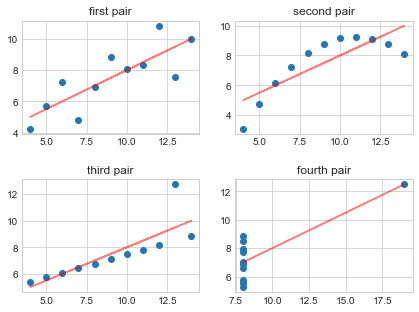

In [85]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.scatter(x1, y1)
ax1.plot(x1, b01 + b11 * x1, c='red', alpha=0.5)
ax1.set_title('first pair')

ax2.scatter(x2, y2)
ax2.plot(x2, b02 + b12 * x2, c='red', alpha=0.5)
ax2.set_title('second pair')

ax3.scatter(x3, y3)
ax3.plot(x3, b03 + b13 * x3, c='red', alpha=0.5)
ax3.set_title('third pair')

ax4.scatter(x4, y4)
ax4.plot(x4, b04 + b14 * x4, c='red', alpha=0.5)
ax4.set_title('fourth pair')

fig.set_size_inches(7, 5)
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()